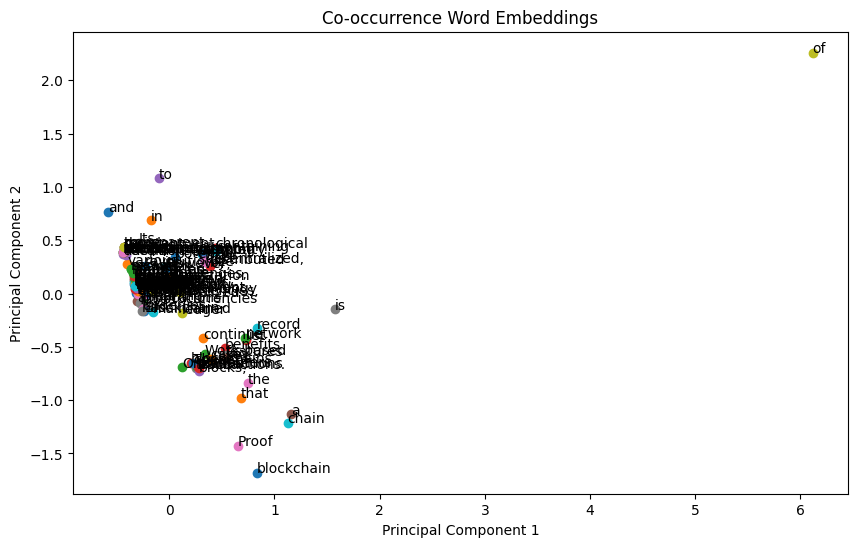

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import PCA

# Sample corpus
corpus = [
    "Blockchain is a decentralized, distributed ledger technology that underlies cryptocurrencies like Bitcoin. It essentially consists of a chain of blocks, each containing a list of transactions. These blocks are linked together using cryptography, forming a chronological record of transactions that is immutable and resistant to tampering.",
    "One of the key features of blockchain is its decentralized nature, meaning that the ledger is maintained by a network of computers (nodes) rather than a central authority. This decentralization enhances security and transparency since no single entity has control over the entire network.",
    "Blockchain technology has applications beyond cryptocurrencies, including supply chain management, voting systems, identity verification, and more. Its potential to revolutionize various industries lies in its ability to provide secure, transparent, and tamper-resistant record-keeping.",
    "However, blockchain technology also faces challenges, such as scalability, energy consumption (particularly in the case of Proof of Work-based blockchains like Bitcoin), regulatory uncertainty, and interoperability issues. Despite these challenges, the potential benefits of blockchain continue to drive research, development, and adoption in various sectors."
]

# Function to generate co-occurrence matrix
def generate_co_occurrence_matrix(corpus, window_size=2):
    co_occurrence_matrix = defaultdict(int)
    vocabulary = set()

    for sentence in corpus:
        words = sentence.split()
        for i, word in enumerate(words):
            vocabulary.add(word)
            for j in range(max(i - window_size, 0), min(i + window_size, len(words))):
                if i != j:
                    co_occurrence_matrix[(word, words[j])] += 1

    return co_occurrence_matrix, list(vocabulary)

# Function to plot co-occurrence word embeddings
def plot_co_occurrence_word_embeddings(matrix, vocabulary):
    pca = PCA(n_components=2)
    word_vectors = pca.fit_transform(matrix)

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(vocabulary):
        plt.scatter(word_vectors[i, 0], word_vectors[i, 1])
        plt.text(word_vectors[i, 0], word_vectors[i, 1], word)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Co-occurrence Word Embeddings')
    plt.show()

# Generate co-occurrence matrix
co_occurrence_matrix, vocabulary = generate_co_occurrence_matrix(corpus)

# Convert co-occurrence matrix to numpy array
vocab_size = len(vocabulary)
co_occurrence_array = np.zeros((vocab_size, vocab_size))
for (word1, word2), count in co_occurrence_matrix.items():
    if word1 in vocabulary and word2 in vocabulary:
        i = vocabulary.index(word1)
        j = vocabulary.index(word2)
        co_occurrence_array[i][j] = count

# Plot co-occurrence word embeddings
plot_co_occurrence_word_embeddings(co_occurrence_array, vocabulary)


In [7]:
def extract_word_types(corpus):
    word_types = set()
    for sentence in corpus:
        words = sentence.split()
        word_types.update(words)
    return word_types

# Example usage:
distinct_words = extract_word_types(corpus)
print("Distinct words in the corpus:", distinct_words)


Distinct words in the corpus: {'regulatory', 'consists', 'One', 'blockchains', 'like', 'tamper-resistant', 'cryptography,', 'Its', 'ledger', 'its', 'Bitcoin.', 'various', '(nodes)', 'benefits', '(particularly', 'interoperability', 'distributed', 'as', 'technology', 'record', 'and', 'decentralization', 'provide', 'by', 'Despite', 'more.', 'Proof', 'transactions.', 'rather', 'since', 'also', 'This', 'computers', 'scalability,', 'record-keeping.', 'lies', 'nature,', 'features', 'including', 'entire', 'revolutionize', 'systems,', 'Work-based', 'over', 'blocks,', 'single', 'the', 'supply', 'identity', 'maintained', 'decentralized', 'case', 'network.', 'chronological', 'adoption', 'a', 'meaning', 'is', 'central', 'no', 'potential', 'that', 'cryptocurrencies', 'list', 'voting', 'together', 'are', 'sectors.', 'blocks', 'forming', 'authority.', 'challenges,', 'secure,', 'transactions', 'linked', 'applications', 'ability', 'uncertainty,', 'management,', 'resistant', 'These', 'transparent,', 'res

In [10]:
import numpy as np
from collections import defaultdict

def construct_co_occurrence_matrix(corpus, window_size=4):
    co_occurrence_matrix = defaultdict(int)
    vocabulary = set()

    for sentence in corpus:
        words = sentence.split()
        for i, target_word in enumerate(words):
            vocabulary.add(target_word)
            context_words = words[max(0, i - window_size): i] + words[i + 1: min(i + window_size + 1, len(words))]
            for context_word in context_words:
                co_occurrence_matrix[(target_word, context_word)] += 1

    vocab_list = list(vocabulary)
    co_occurrence_array = np.zeros((len(vocab_list), len(vocab_list)))

    for (word1, word2), count in co_occurrence_matrix.items():
        i = vocab_list.index(word1)
        j = vocab_list.index(word2)
        co_occurrence_array[i][j] = count

    return co_occurrence_array, vocab_list

# Example usage:
corpus = [
    "Blockchain is a decentralized, distributed ledger technology that underlies cryptocurrencies like Bitcoin. It essentially consists of a chain of blocks, each containing a list of transactions. These blocks are linked together using cryptography, forming a chronological record of transactions that is immutable and resistant to tampering.",
    "One of the key features of blockchain is its decentralized nature, meaning that the ledger is maintained by a network of computers (nodes) rather than a central authority. This decentralization enhances security and transparency since no single entity has control over the entire network.",
    "Blockchain technology has applications beyond cryptocurrencies, including supply chain management, voting systems, identity verification, and more. Its potential to revolutionize various industries lies in its ability to provide secure, transparent, and tamper-resistant record-keeping.",
    "However, blockchain technology also faces challenges, such as scalability, energy consumption (particularly in the case of Proof of Work-based blockchains like Bitcoin), regulatory uncertainty, and interoperability issues. Despite these challenges, the potential benefits of blockchain continue to drive research, development, and adoption in various sectors."

]

co_occurrence_matrix, vocabulary = construct_co_occurrence_matrix(corpus)
print("Co-occurrence matrix:")
print(co_occurrence_matrix)
print("Vocabulary:")
print(vocabulary)


Co-occurrence matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
Vocabulary:
['regulatory', 'consists', 'One', 'blockchains', 'like', 'tamper-resistant', 'cryptography,', 'Its', 'ledger', 'its', 'Bitcoin.', 'various', '(nodes)', 'benefits', '(particularly', 'interoperability', 'distributed', 'as', 'technology', 'record', 'and', 'decentralization', 'provide', 'by', 'Despite', 'more.', 'Proof', 'transactions.', 'rather', 'since', 'also', 'This', 'computers', 'scalability,', 'record-keeping.', 'lies', 'nature,', 'features', 'including', 'entire', 'revolutionize', 'systems,', 'Work-based', 'over', 'blocks,', 'single', 'the', 'supply', 'identity', 'maintained', 'decentralized', 'case', 'network.', 'chronological', 'adoption', 'a', 'meaning', 'is', 'central', 'no', 'potential', 'that', 'cryptocurrencies', 'list', 'voting', 'together', 'are', 'sectors.', 'blocks', 'forming', 'autho

In [11]:
from sklearn.decomposition import PCA

def reduce_dimensionality(co_occurrence_matrix, k):
    pca = PCA(n_components=k)
    embeddings = pca.fit_transform(co_occurrence_matrix)
    return embeddings

# Example usage:
k = 2  # Number of dimensions for embeddings
embeddings = reduce_dimensionality(co_occurrence_matrix, k)
print("Embeddings shape:", embeddings.shape)
print("Embeddings:")
print(embeddings)


Embeddings shape: (122, 2)
Embeddings:
[[-7.35582842e-01  1.12926288e-01]
 [ 1.09934530e+00 -7.24709786e-01]
 [ 2.47305422e-01 -1.92214035e-01]
 [ 6.71403337e-01 -1.81994825e-01]
 [ 4.16697684e-01 -6.01429740e-02]
 [-1.05248838e+00  2.36242811e-01]
 [-2.21904855e-01 -1.02619063e+00]
 [-1.05524520e+00  9.99471168e-01]
 [ 1.03969331e+00 -4.71261154e-01]
 [ 3.69574231e-01  1.64074794e+00]
 [ 1.86505691e-01 -5.33687238e-01]
 [-9.63691347e-01  1.98649858e+00]
 [ 8.10067322e-01 -1.02775142e+00]
 [ 2.47013336e-01  6.97262665e-01]
 [ 1.12162806e-01  2.79154164e-02]
 [-9.13850944e-01  2.53267791e-01]
 [-7.39338358e-02 -7.14691472e-01]
 [-8.22900498e-01 -3.67946294e-01]
 [-1.02969331e-01 -8.42760271e-01]
 [ 6.31480542e-01 -5.77484427e-01]
 [-7.51888535e-01  4.42274130e+00]
 [-6.61259897e-01 -4.04285046e-01]
 [-9.88058112e-01  1.05219126e+00]
 [ 9.31960240e-01 -4.76258622e-01]
 [-6.81720340e-01  4.66968298e-01]
 [-1.04910947e+00  8.30672819e-01]
 [ 9.96787352e-01  7.45482751e-02]
 [ 4.74302352e-0

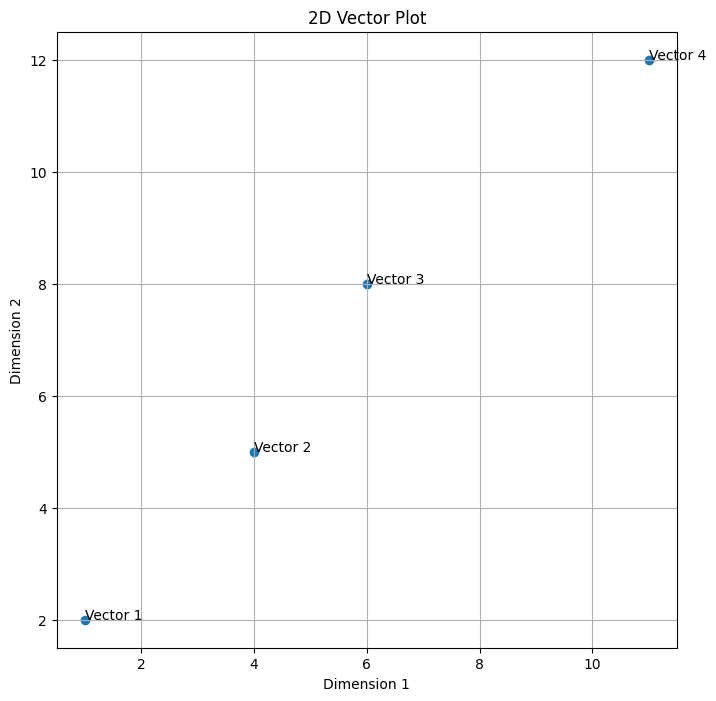

In [12]:
import matplotlib.pyplot as plt

def plot_2d_vectors(vectors, labels=None):
    """
    Plot a set of 2D vectors in 2D space.

    Parameters:
    vectors (list of tuples or numpy arrays): The list of 2D vectors to plot.
    labels (list of str, optional): Labels for the vectors.

    Returns:
    None
    """
    x = [v[0] for v in vectors]
    y = [v[1] for v in vectors]

    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)

    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (x[i], y[i]))

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('2D Vector Plot')
    plt.grid(True)
    plt.show()

# Example usage:
vectors = [(1, 2), (4, 5), (6, 8), (11, 12)]
labels = ['Vector 1', 'Vector 2', 'Vector 3', 'Vector 4']
plot_2d_vectors(vectors, labels)
